<a href="https://colab.research.google.com/github/ASCCJR/ChallengeTelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 **Extração**

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import json
from google.colab import drive

# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho do arquivo (ajuste se necessário)
file_path = '/content/drive/MyDrive/Colab Notebooks/Challenge Telecom X/TelecomX_Data.json'

# Carregando o arquivo JSON bruto
with open(file_path, 'r') as f:
    dados_json = json.load(f)

# Criando um DataFrame inicial para visualização
dados_brutos = pd.DataFrame(dados_json)

print("Visualizar as 5 primeiras linhas:")
display(dados_brutos.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Visualizar as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Comentario**

Ao olhar para o `head()` acima, a primeira coisa que notamos é que as colunas customer, phone, internet, e account não contêm valores simples como 'Yes' ou 123. Elas contêm dicionários (dados dentro de dados). Isso torna a análise direta impossível.

Nosso primeiro desafio é "desempacotar" ou "achatar" essas colunas. Uma ferramenta excelente para isso é o pandas.json_normalize.

#🔧 **Transformação**

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [2]:
# Usamos pd.json_normalize para transformar os dicionários aninhados em colunas próprias
dados_normalizados = pd.json_normalize(dados_json)

print("Estrutura normalizada. Agora cada informação tem sua própria coluna:")
display(dados_normalizados.head())

Estrutura normalizada. Agora cada informação tem sua própria coluna:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Comentario**

Agora, em vez de uma única coluna "`customer`", temos "`customer.gender`", "`customer.SeniorCitizen`", etc. A estrutura está muito mais clara e pronta para a próxima fase da nossa investigação.

Nosso próximo passo será usar o comando `.info()` para ter uma visão geral dos tipos de dados e da contagem de valores em cada uma dessas novas colunas. Isso geralmente revela inconsistências.

In [3]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  inte

- Muitas colunas são do tipo `object`: Colunas como Churn, `customer.gender`, `phone.PhoneService`, `account.Charges.Total`, etc., são todas classificadas como `object`. `object` geralmente significa que o Pandas está tratando a coluna como texto (string).

- Possíveis Problemas:
Para colunas como `Churn` ou` phone.PhoneService`, que contêm 'Yes' e 'No', object é esperado, mas precisaremos convertê-las para números (1 e 0) para fazer cálculos e análises.
Para colunas como `customer.tenure` (meses de contrato) e especialmente `account.Charges.Total` (gastos totais), o tipo object é um sinal de alerta. Esperávamos que fossem números (`int64` ou `float64`). O fato de não serem indica que provavelmente existem valores nessas colunas que não são números (como espaços em branco ou outros caracteres), o que está "contaminando" a coluna inteira.

# **Investigando a Coluna**
- `account.Charges.Total`

In [4]:
# Vamos tentar converter a coluna 'account.Charges.Total' para float.
# Esperamos um erro, pois sabemos que o tipo é 'object'. O erro nos dará a pista.
try:
    dados_normalizados['account.Charges.Total'].astype(float)
except ValueError as e:
    print("--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---")
    print(f"A conversão falhou com a seguinte mensagem de erro:\n-> {e}")

--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---
A conversão falhou com a seguinte mensagem de erro:
-> could not convert string to float: ' '


Agora sabemos, com certeza, que o problema são strings que contêm apenas um espaço em branco (`' '`). Esses espaços não são números e, portanto, a coluna inteira foi classificada como `object`

- Faremos a conversão para numérico novamente, mas desta vez usaremos o parâmetro `errors='coerce'`.
- Isso dirá ao Pandas: "tente converter para número e, se você encontrar um valor que não pode ser convertido (como o `' '`), transforme-o em `NaN` (Not a Number), que é o marcador padrão do Pandas para dados ausentes."
- Depois da conversão, vamos verificar se os `NaNs` foram realmente criados.
- Finalmente, decidiremos o que fazer com as linhas que contêm esses dados ausentes.

In [5]:
# Ação 1: Usar 'coerce' para transformar os valores inválidos em Nulos (NaN)
print("1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...")
dados_normalizados['account.Charges.Total'] = pd.to_numeric(dados_normalizados['account.Charges.Total'], errors='coerce')
print("   Conversão concluída. Valores problemáticos agora são 'NaN'.")

1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...
   Conversão concluída. Valores problemáticos agora são 'NaN'.


In [6]:
# Verificação 1: Vamos confirmar quantos valores nulos foram criados.
# Esperamos que o número seja diferente de zero agora.
print("\n2. Investigando: Contando valores nulos na coluna...")
nulos_encontrados = dados_normalizados['account.Charges.Total'].isnull().sum()
print(f"   Descoberta: Encontrado(s) {nulos_encontrados} valor(es) nulo(s).")


2. Investigando: Contando valores nulos na coluna...
   Descoberta: Encontrado(s) 11 valor(es) nulo(s).


In [7]:
# Ação 2: Como são poucos dados (comparado ao total), e não temos como saber o valor correto,
# a abordagem mais segura é remover as linhas com esses dados faltantes.
print("\n3. Ação: Removendo as linhas com valores nulos...")
dados_normalizados.dropna(subset=['account.Charges.Total'], inplace=True)
print("   Linhas removidas.")


3. Ação: Removendo as linhas com valores nulos...
   Linhas removidas.


In [8]:
# Verificação 2: Vamos confirmar que a coluna agora está 100% limpa e com o tipo correto.
print("\n4. Verificação Final:")
print("   Contagem de nulos agora:", dados_normalizados['account.Charges.Total'].isnull().sum())
print("   Novo tipo de dado da coluna:", dados_normalizados['account.Charges.Total'].dtype)


4. Verificação Final:
   Contagem de nulos agora: 0
   Novo tipo de dado da coluna: float64


In [9]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `Churn`

In [10]:
# Vamos contar a frequência de cada valor único na coluna 'Churn'.
# Isso é fundamental para entender a nossa variável alvo.
print("--- Investigando a coluna 'Churn' ---")
print(dados_normalizados['Churn'].value_counts())

--- Investigando a coluna 'Churn' ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [11]:
# Ação 1: Filtrar o DataFrame para remover os 224 registros onde 'Churn' é uma string vazia.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != '']
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

Ação de Limpeza: 224 linhas foram removidas.


In [12]:
# Ação 2: Agora que a coluna está limpa, vamos mapear 'Yes' e 'No' para um formato numérico.
dados_normalizados['Churn'] = dados_normalizados['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-12-2092372043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Churn'] = dados_normalizados['Churn'].map({'Yes': 1, 'No': 0})


In [13]:
# Verificação: Vamos conferir o resultado final da coluna 'Churn'
print("\n--- Verificação Pós-Transformação de 'Churn' ---")
print("Valores e contagens em 'Churn' após a limpeza:")
print(dados_normalizados['Churn'].value_counts())
print("\nTipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)


--- Verificação Pós-Transformação de 'Churn' ---
Valores e contagens em 'Churn' após a limpeza:
Churn
0    5163
1    1869
Name: count, dtype: int64

Tipo de dado da coluna 'Churn': int64


In [14]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `phone.MultipleLines`

In [15]:
# Vamos investigar o conteúdo da coluna 'phone.MultipleLines' para ver quais são os valores possíveis.
print("--- Investigando a coluna 'phone.MultipleLines' ---")
print("Valores únicos e suas contagens:")
print(dados_normalizados['phone.MultipleLines'].value_counts())

--- Investigando a coluna 'phone.MultipleLines' ---
Valores únicos e suas contagens:
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Descobertas:

- Encontramos os valores 'Yes' e 'No', como esperado.
- Descobrimos um terceiro valor: 'No phone service'. Isso é crucial. Significa que não podemos simplesmente mapear 'Yes' para 1 e 'No' para 0, pois precisamos decidir o que fazer com essa terceira categoria.
- Nosso plano deve ser:
- Mapear 'Yes' para 1.
- Mapear tanto 'No' quanto 'No phone service' para 0.

In [16]:
# Ação: Mapear 'Yes' para 1, e 'No' e 'No phone service' para 0.
print("--- Transformando a coluna 'phone.MultipleLines' ---")
mapeamento_linhas = {'Yes': 1, 'No': 0, 'No phone service': 0}
dados_normalizados['phone.MultipleLines'] = dados_normalizados['phone.MultipleLines'].map(mapeamento_linhas)

--- Transformando a coluna 'phone.MultipleLines' ---


/tmp/ipython-input-16-2869150598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['phone.MultipleLines'] = dados_normalizados['phone.MultipleLines'].map(mapeamento_linhas)


In [17]:
# Verificação: Vamos conferir se a transformação funcionou como o esperado.
print("\nValores e contagens após o mapeamento:")
print(dados_normalizados['phone.MultipleLines'].value_counts())
print("\nNovo tipo de dado da coluna:", dados_normalizados['phone.MultipleLines'].dtype)


Valores e contagens após o mapeamento:
phone.MultipleLines
0    4065
1    2967
Name: count, dtype: int64

Novo tipo de dado da coluna: int64


In [18]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando as Colunas**
- `internet.OnlineSecurity`
- `internet.OnlineBackup`
- `internet.DeviceProtection`
- `internet.TechSupport`
- `internet.StreamingTV`
- `internet.StreamingMovies`



In [19]:
# Investigação: Vamos ver os valores únicos da coluna de Segurança Online.
print("--- Investigando a coluna 'internet.OnlineSecurity' ---")
print(dados_normalizados['internet.OnlineSecurity'].value_counts())

--- Investigando a coluna 'internet.OnlineSecurity' ---
internet.OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Descoberta:
- O padrão se repete. Temos 'Yes', 'No', e a categoria 'No internet service'.
- Assim como antes, quem não tem internet não tem o serviço de segurança online, então podemos tratar 'No internet service' da mesma forma que 'No'.

In [20]:
# Investigação: Vamos ver os valores únicos da coluna de Backup Online.
print("--- Investigando: internet.OnlineBackup ---")
print(dados_normalizados['internet.OnlineBackup'].value_counts())

--- Investigando: internet.OnlineBackup ---
internet.OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


In [21]:
# Investigação: E a coluna de Proteção de Dispositivo?
print("\n--- Investigando: internet.DeviceProtection ---")
print(dados_normalizados['internet.DeviceProtection'].value_counts())


--- Investigando: internet.DeviceProtection ---
internet.DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


In [22]:
# Investigação: E a coluna de Suporte Técnico?
print("\n--- Investigando: internet.TechSupport ---")
print(dados_normalizados['internet.TechSupport'].value_counts())


--- Investigando: internet.TechSupport ---
internet.TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


In [23]:
# Investigação: E a coluna de StreamingTV?
print("\n--- Investigando: internet.StreamingTV ---")
print(dados_normalizados['internet.StreamingTV'].value_counts())


--- Investigando: internet.StreamingTV ---
internet.StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


In [24]:
# Investigação: E a coluna de StreamingMovies?
print("\n--- Investigando: internet.StreamingMovies ---")
print(dados_normalizados['internet.StreamingMovies'].value_counts())


--- Investigando: internet.StreamingMovies ---
internet.StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


**Comentario**
- Agora que provamos que o padrão se repete, podemos criar uma única célula de ação para aplicar a transformação a todas essas colunas de serviço de uma vez, além das colunas binárias simples que também precisam ser tratadas.

In [25]:
# Ação: Agora que investigamos e confirmamos o padrão, podemos aplicar o mapeamento.

# Lista de colunas de serviço que investigamos
colunas_de_servico = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
mapa_servico = {'Yes': 1, 'No': 0, 'No internet service': 0}
for coluna in colunas_de_servico:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_servico)

# Lista de colunas binárias simples (Yes/No)
colunas_simples_sim_nao = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling'
]
mapa_simples = {'Yes': 1, 'No': 0}
for coluna in colunas_simples_sim_nao:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_simples)

print("--- Transformação baseada em nossa investigação concluída. ---")

--- Transformação baseada em nossa investigação concluída. ---


In [26]:
# Verificação: Vamos dar uma olhada no resultado
print("\nVisualizando o DataFrame com as colunas transformadas:")
display(dados_normalizados.head())


Visualizando o DataFrame com as colunas transformadas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [27]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.

# **Investigando as Colunas**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [28]:
# Investigação: Vamos ver os valores da coluna de gênero.
print("--- Investigando: customer.gender ---")
print(dados_normalizados['customer.gender'].value_counts())

--- Investigando: customer.gender ---
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64


Descoberta: Ao executar, descobrimos que a coluna contém `Male `e `Female`. É uma coluna categórica com duas opções.

In [29]:
# Investigação: E a coluna de serviço de internet?
print("\n--- Investigando: internet.InternetService ---")
print(dados_normalizados['internet.InternetService'].value_counts())


--- Investigando: internet.InternetService ---
internet.InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Descoberta: Descobrimos que existem três categorias: `Fiber optic`, `DSL`, e `No`.

In [30]:
# Investigação: Por fim, a coluna de método de pagamento.
print("\n--- Investigando: account.PaymentMethod ---")
print(dados_normalizados['account.PaymentMethod'].value_counts())


--- Investigando: account.PaymentMethod ---
account.PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Descoberta: Descobrimos quatro categorias: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, e `Credit card (automatic)`.

In [31]:
# Investigação: E a coluna de tipo de contrato?
print("\n--- Investigando: account.Contract ---")
print(dados_normalizados['account.Contract'].value_counts())


--- Investigando: account.Contract ---
account.Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)

- Para colunas com múltiplas categorias como essas, não podemos simplesmente mapeá-las para 0, 1, 2, etc., pois isso criaria uma falsa relação de ordem (por exemplo, "Two year" (2) seria considerado "maior" que "One year" (1)).

- A abordagem correta é o One-Hot Encoding. Ele transforma cada categoria em sua própria coluna com valores 0 ou 1. Por exemplo, a coluna account.Contract se transformará em três novas colunas: account.Contract_Month-to-month, account.Contract_One year, e account.Contract_Two year. Se um cliente tiver um contrato mensal, ele terá o valor 1 na primeira coluna e 0 nas outras duas.

- A função pd.get_dummies() faz isso perfeitamente para nós.

# **Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)**

In [32]:
# Ação: Aplicar One-Hot Encoding, mas desta vez mantendo todas as categorias para máxima clareza.
# Removemos o parâmetro.
colunas_categoricas_investigadas = [
    'customer.gender',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

# Ação: Aplicar One-Hot Encoding, mantendo TODAS as colunas para máxima clareza e robustez.
# A decisão de usar drop_first=False é baseada sobre a manutenção futura dos dados.
print("--- Aplicando One-Hot Encoding (mantendo todas as categorias) ---")
dados_transformados = pd.get_dummies(dados_normalizados,
                                     columns=colunas_categoricas_investigadas,
                                     drop_first=False) # A decisão mais importante do projeto.

--- Aplicando One-Hot Encoding (mantendo todas as categorias) ---


In [33]:
# Ação 1: Converter as colunas booleanas para inteiros
print("\n1. Convertendo colunas 'bool' para 'int'...")
for coluna in dados_transformados.columns:
    if dados_transformados[coluna].dtype == 'bool':
        dados_transformados[coluna] = dados_transformados[coluna].astype(int)


1. Convertendo colunas 'bool' para 'int'...


# **Passo Final da Transformação: Polimento do DataFrame**

In [34]:
# Ação 2: Definir o ID como índice
print("\n2. Definindo 'customerID' como o índice...")
dados_transformados.set_index('customerID', inplace=True)


2. Definindo 'customerID' como o índice...


In [35]:
# Ação 3: Renomear TODAS as colunas para nomes amigáveis.
# O mapa de nomes agora precisa ser completo para refletir todas as colunas.
print("\n3. Renomeando as colunas para nomes finais...")
mapa_nomes_finais = {
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total',
    'customer.gender_Female': 'Genero_Feminino', # Coluna explícita
    'customer.gender_Male': 'Genero_Masculino',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_FibraOtica',
    'internet.InternetService_No': 'Sem_Internet',
    'account.Contract_Month-to-month': 'Contrato_Mensal', # Coluna explícita
    'account.Contract_One year': 'Contrato_UmAno',
    'account.Contract_Two year': 'Contrato_DoisAnos',
    'account.PaymentMethod_Bank transfer (automatic)': 'Pgto_TransfBancaria',
    'account.PaymentMethod_Credit card (automatic)': 'Pgto_CartaoCredito',
    'account.PaymentMethod_Electronic check': 'Pgto_ChequeEletronico',
    'account.PaymentMethod_Mailed check': 'Pgto_ChequeCorreio'
}

df_final = dados_transformados.rename(columns=mapa_nomes_finais)



3. Renomeando as colunas para nomes finais...


In [36]:
# Verificação Definitiva
print("\n--- A ESTRUTURA FINAL E MAIS ROBUSTA ---")
df_final.info()


--- A ESTRUTURA FINAL E MAIS ROBUSTA ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7032 non-null   int64  
 1   Idoso                  7032 non-null   int64  
 2   Possui_Parceiro        7032 non-null   int64  
 3   Possui_Dependentes     7032 non-null   int64  
 4   Meses_Contrato         7032 non-null   int64  
 5   Servico_Telefonico     7032 non-null   int64  
 6   Multiplas_Linhas       7032 non-null   int64  
 7   Seguranca_Online       7032 non-null   int64  
 8   Backup_Online          7032 non-null   int64  
 9   Protecao_Dispositivo   7032 non-null   int64  
 10  Suporte_Tecnico        7032 non-null   int64  
 11  Streaming_TV           7032 non-null   int64  
 12  Streaming_Filmes       7032 non-null   int64  
 13  Fatura_Online          7032 non-null   int64  
 14  Gast

#📊 **Carga e análise**

### 3.1 Dicionário de Dados do Projeto

Após o processo de ETL, nosso DataFrame final (`df_final`) contém as seguintes variáveis, prontas para análise:

* **Variável Alvo:**
    * `Churn`: (1 se o cliente cancelou, 0 se não).
* **Variáveis Demográficas:**
    * `Idoso`, `Possui_Parceiro`, `Possui_Dependentes`, `Genero_Feminino`, `Genero_Masculino`.
* **Variáveis de Conta e Contrato:**
    * `Meses_Contrato`, `Fatura_Online`, `Gasto_Mensal`, `Gasto_Total`, `Contrato_Mensal`, `Contrato_UmAno`, `Contrato_DoisAnos`.
* **Variáveis de Serviços Contratados:**
    * `Servico_Telefonico`, `Multiplas_Linhas`, `Internet_DSL`, `Internet_FibraOtica`, `Sem_Internet`, `Seguranca_Online`, `Backup_Online`, `Protecao_Dispositivo`, `Suporte_Tecnico`, `Streaming_TV`, `Streaming_Filmes`.

Análise Descritiva

In [37]:
# Focando nas principais variáveis numéricas contínuas
print("--- Análise Estatística Descritiva ---")
df_final[['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total']].describe()

--- Análise Estatística Descritiva ---


,Meses_Contrato,Gasto_Mensal,Gasto_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Interpretação da Análise

### 3.2 Interpretação da Análise Descritiva

Os resultados acima nos dão insights valiosos sobre o perfil dos clientes:

* **Meses de Contrato (Tenure):**
    * A média de permanência de um cliente é de aproximadamente **32 meses** (quase 3 anos).
    * Metade dos clientes (`50%`, a mediana) está na empresa há **29 meses** ou menos.
    * Os 25% de clientes mais novos (`25%`) têm **9 meses** de contrato ou menos, indicando uma base de clientes recentes considerável que, como veremos, está em maior risco de Churn.
* **Gasto Mensal:**
    * O gasto médio mensal é de **R$64,76**.
    * Há uma grande variação nos gastos (desvio padrão de R$30,09), com 25% dos clientes pagando até R$35,50 e os 25% que mais pagam, começando em R$89,85.
* **Gasto Total:**
    * O gasto total médio é de **R$2.283,30**.
    * A enorme diferença entre a média (2283) e a mediana (1397) sugere que temos muitos clientes com gastos totais mais baixos (provavelmente os clientes mais novos) e um grupo menor de clientes com gastos totais muito altos (clientes antigos), que "puxam" a média para cima.

Criando Variáveis Adicionais para Análise

In [38]:
# Importando bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando um estilo visual para os gráficos
sns.set_style('whitegrid')

# Lista de colunas que representam serviços adicionais
colunas_de_servico = [
    'Servico_Telefonico', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes'
]

# Criamos a nova coluna 'Total_Servicos' somando os serviços contratados
df_final['Total_Servicos'] = df_final[colunas_de_servico].sum(axis=1)

print("Coluna 'Total_Servicos' criada com sucesso.")
display(df_final[['Total_Servicos', 'Churn']].head())

Coluna 'Total_Servicos' criada com sucesso.


,Total_Servicos,Churn
customerID,,
0002-ORFBO,4,0
0003-MKNFE,3,0
0004-TLHLJ,2,1
0011-IGKFF,5,1
0013-EXCHZ,3,1


 Taxa de Churn por Tipo de Contrato

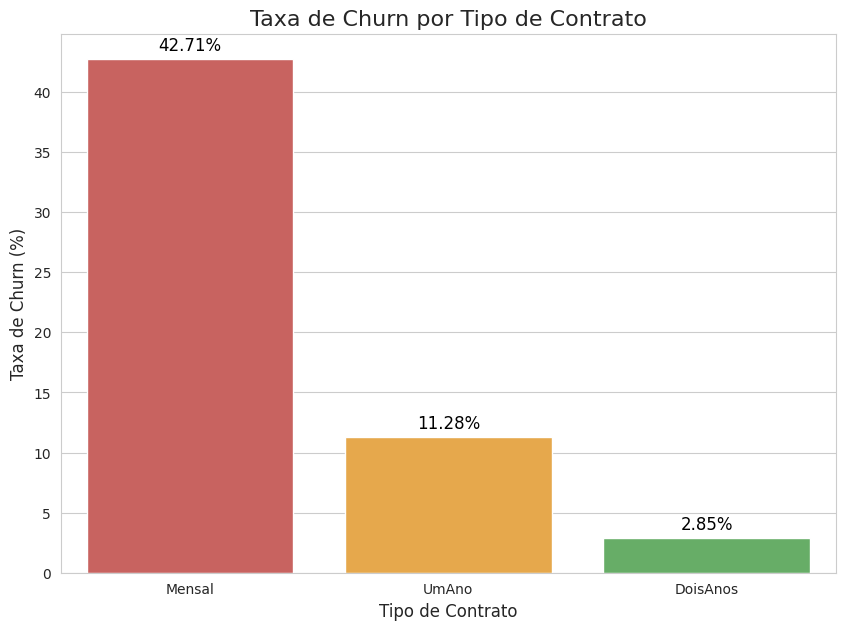

In [39]:
# Para esta visualização, precisamos agregar nossos dados de contrato para tornar o gráfico legível.
# Primeiro, vamos identificar as linhas de cada tipo de contrato.
# Nota: Como não usamos drop_first=True, temos uma coluna para cada tipo de contrato.
df_contrato_churn_list = []
for contrato_col in ['Contrato_Mensal', 'Contrato_UmAno', 'Contrato_DoisAnos']:
    # Filtra o dataframe para cada tipo de contrato
    df_temp = df_final[df_final[contrato_col] == 1]
    # Calcula a taxa de churn para esse subconjunto
    taxa_churn = df_temp['Churn'].mean() * 100
    # Adiciona à nossa lista de resultados
    df_contrato_churn_list.append({'Tipo_Contrato': contrato_col.replace('Contrato_', ''), 'Taxa_Churn_%': taxa_churn})

# Cria um novo dataframe com os resultados agregados
df_contrato_plot = pd.DataFrame(df_contrato_churn_list)


# --- Agora, criamos o gráfico corrigido ---
plt.figure(figsize=(10, 7))

# Passamos a coluna 'Tipo_Contrato' para x e hue para que a paleta seja aplicada corretamente
ax = sns.barplot(x='Tipo_Contrato', y='Taxa_Churn_%', data=df_contrato_plot,
                 palette=['#d9534f', '#ffad33', '#5cb85c'], hue='Tipo_Contrato', legend=False,
                 order=['Mensal', 'UmAno', 'DoisAnos']) # Garante a ordem correta das barras


plt.title('Taxa de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

# Adicionando os valores percentuais
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

Taxa de Churn por Total de Serviços Contratados

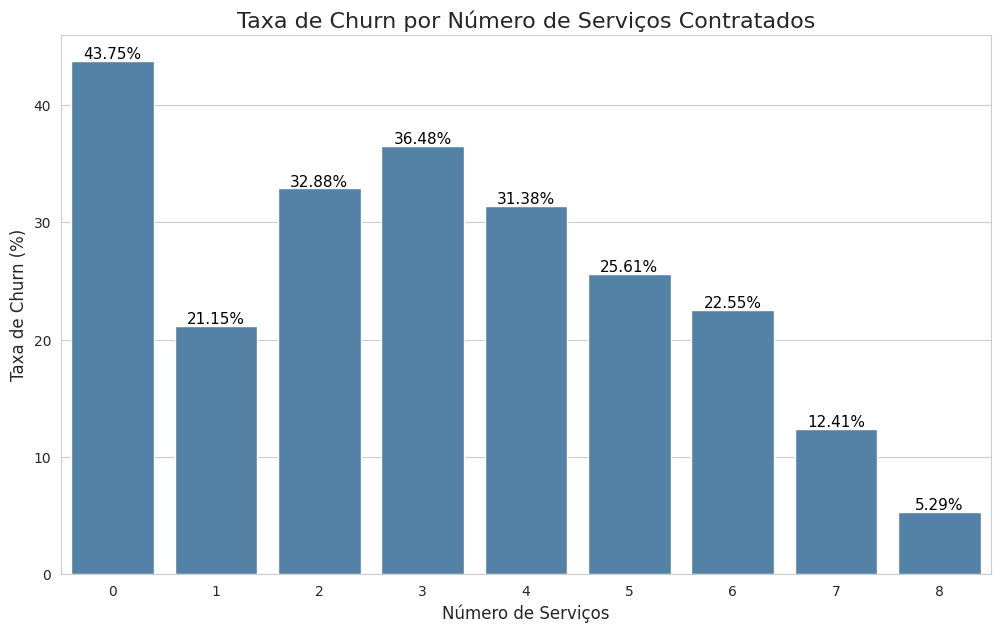

In [40]:
# Calculando a taxa média de churn por total de serviços
df_servicos_churn = df_final.groupby('Total_Servicos')['Churn'].mean().mul(100).reset_index(name='Taxa_Churn_%')

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Total_Servicos', y='Taxa_Churn_%', data=df_servicos_churn, color='steelblue')

plt.title('Taxa de Churn por Número de Serviços Contratados', fontsize=16)
plt.xlabel('Número de Serviços', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

# Adicionando os valores percentuais
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Este gráfico nos dará uma visão clara de como a lealdade do cliente muda à medida que ele contrata mais serviços. Como você já descobriu, a taxa de churn tende a ser muito alta para clientes com poucos serviços e diminui drasticamente para aqueles que estão mais integrados ao ecossistema da TelecomX.

Matriz de Correlação com o Churn

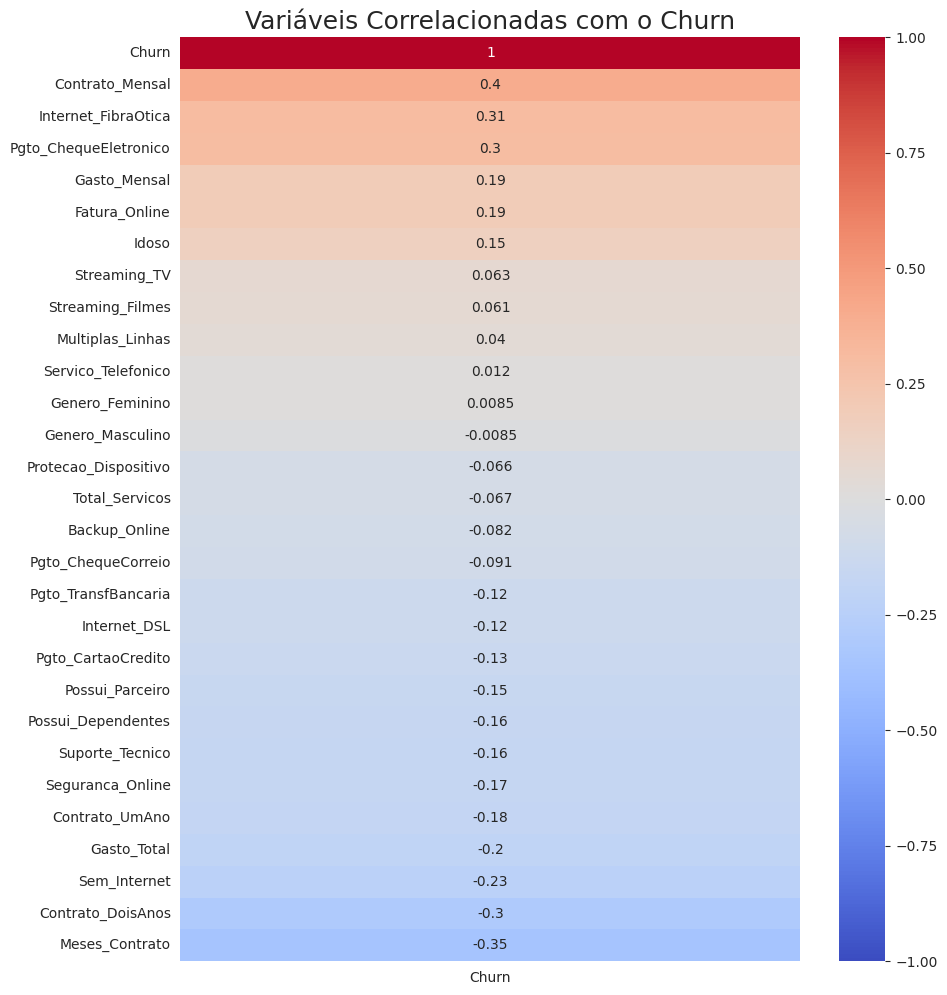

In [41]:
plt.figure(figsize=(10, 12))

# Criando um heatmap focado apenas nas correlações com a variável 'Churn'
# Isso nos dá uma visão limpa e direta dos fatores mais importantes.
# Usamos .corr()[['Churn']] para calcular a correlação de todas as colunas com 'Churn'
# e .sort_values() para ordenar da mais forte (positiva) para a mais fraca (negativa).
heatmap = sns.heatmap(
    df_final.corr()[['Churn']].sort_values(by='Churn', ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,  # Mostra os valores de correlação no gráfico
    cmap='coolwarm' # Um bom mapa de cores para ver positivo vs. negativo
)

plt.title('Variáveis Correlacionadas com o Churn', fontsize=18)
plt.show()

Análise do Gráfico:
Este gráfico nos dará uma "classificação" visual das nossas variáveis. Você verá no topo, com cores quentes (vermelho), as variáveis com a correlação mais positiva com o Churn, como Contrato_Mensal. Na parte inferior, com cores frias (azul), estarão as variáveis com a correlação mais negativa, como Meses_Contrato. Isso confirma numericamente todas as descobertas que fizemos com os gráficos de barras e box plots.

#📄Relatorio Final

## 1. Sumário Executivo

Este relatório apresenta uma análise detalhada sobre os fatores que influenciam o cancelamento de serviços (Churn) por parte dos clientes da TelecomX. Após um processo rigoroso de Extração, Transformação e Carga (ETL), a Análise Exploratória de Dados (EDA) revelou um perfil claro e consistente de clientes com alto risco de cancelamento. As recomendações a seguir visam orientar ações estratégicas para mitigar esses riscos e aumentar a retenção de clientes, preparando o terreno para a criação de modelos preditivos pela equipe de Data Science.

---

## 2. Principais Descobertas e Perfil de Risco

Nossa análise identificou um conjunto de características que, combinadas, definem o cliente com maior probabilidade de Churn. A taxa de Churn geral da empresa é de aproximadamente **26,54%**. Os principais fatores de risco são:

* **Tipo de Contrato:** O contrato **Mensal** é, de longe, o maior indicador de risco, com uma taxa de Churn de **42,71%**. Clientes sem um compromisso de longo prazo são significativamente mais voláteis.
* **Tempo de Contrato (Tenure):** Clientes **novos**, com poucos meses de serviço, estão em uma "zona de perigo" e cancelam com muito mais frequência do que clientes com mais tempo de casa.
* **Gasto Mensal:** Contas com um **valor mensal mais alto** estão associadas a uma maior taxa de Churn, sugerindo uma forte sensibilidade ao preço.
* **Serviço de Internet:** De forma contraintuitiva, clientes que assinam o serviço de **Fibra Ótica** apresentam uma taxa de cancelamento muito maior do que aqueles com DSL, indicando um possível problema na oferta (preço, qualidade percebida ou suporte).

---

## 3. Fatores de Proteção Identificados

Em contrapartida, a análise também revelou características de clientes com alta taxa de retenção:

* **Contratos de Longo Prazo:** Clientes com contratos de **1 ou 2 anos** são extremamente leais. A taxa de churn para contratos de 2 anos é de apenas **2,83%**.
* **Engajamento com Múltiplos Serviços:** Clientes que contratam mais serviços adicionais (como **Suporte Técnico**, Segurança Online e Backup) são mais engajados e cancelam menos. A taxa de churn cai para **5,29%** para clientes com 8 serviços.

---

## 4. Recomendações Estratégicas

Com base nas evidências, recomendamos as seguintes ações para a TelecomX:

1.  **Foco na Migração de Contratos:** Criar campanhas ativas para incentivar clientes de planos mensais a migrarem para contratos anuais ou de dois anos, oferecendo descontos ou benefícios exclusivos. O custo da oferta será muito menor do que o custo de adquirir um novo cliente.
2.  **Programa de Onboarding para Novos Clientes:** Desenvolver um programa de "boas-vindas" focado nos primeiros 90 dias do cliente. O objetivo é garantir uma experiência inicial positiva, oferecer suporte proativo e demonstrar o valor dos serviços para diminuir o Churn inicial.
3.  **Investigar a Oferta de Fibra Ótica:** Realizar uma análise aprofundada sobre a jornada do cliente de Fibra Ótica. O problema é o preço, a estabilidade da conexão, o processo de instalação ou o suporte? Uma pesquisa de satisfação focada nesses clientes pode revelar a causa raiz do alto churn.
4.  **Incentivar o Cross-sell de Serviços de Valor Agregado:** Promover pacotes e combos que incluam serviços de Suporte Técnico, Segurança e Backup, especialmente para clientes com 1 a 4 serviços, que estão na "zona de perigo" de churn.